    Fruit  Red  Green  Blue
0   Apple  180     20    30
1   Apple  190     30    40
2   Apple  170     25    35
3  Orange  255    120    70
4  Orange  250    110    65
5  Orange  245    105    60
6  Banana  240    240   240
7  Banana  230    230   230
8  Banana  220    220   220
    Fruit  Red  Green  Blue  Cluster
0   Apple  180     20    30        2
1   Apple  190     30    40        2
2   Apple  170     25    35        2
3  Orange  255    120    70        0
4  Orange  250    110    65        0
5  Orange  245    105    60        0
6  Banana  240    240   240        1
7  Banana  230    230   230        1
8  Banana  220    220   220        1


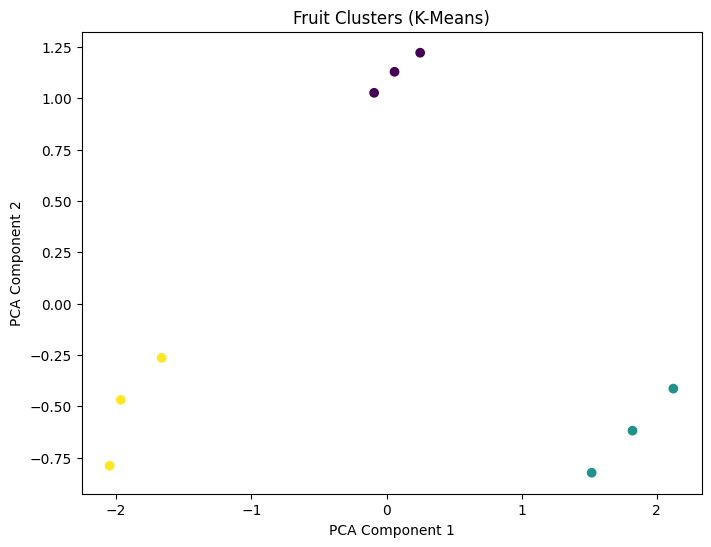

In [1]:
#KMeans Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Sample dataset: Fruit type with average RGB values
data = {'Fruit': ['Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange', 'Banana', 'Banana', 'Banana'],
        'Red': [180, 190, 170, 255, 250, 245, 240, 230, 220],
        'Green': [20, 30, 25, 120, 110, 105, 240, 230, 220],
        'Blue': [30, 40, 35, 70, 65, 60, 240, 230, 220]}

df = pd.DataFrame(data)
print(df)


# Extracting the features (Red, Green, Blue)
X = df[['Red', 'Green', 'Blue']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
df['Cluster'] = kmeans.labels_
print(df)


# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Fruit Clusters (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
